# Forecasting Industrial Production Trends in Algeria

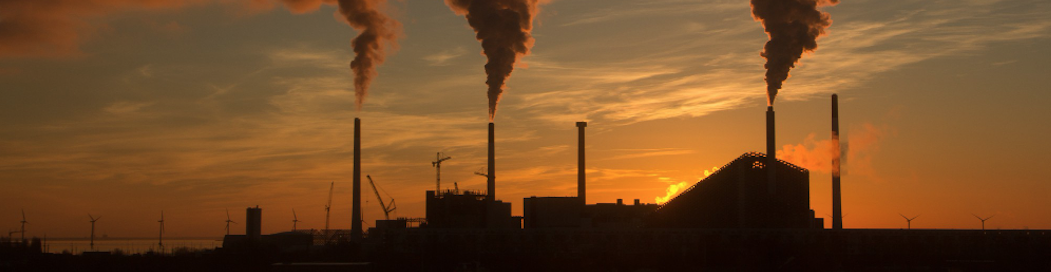

This file contains codes which builds a model that forecasts the Industrial Production Trends in Algeria, given yearly General Index from 1970 to 2020. 


To achieve this, the following tasks are performed:
- Importing libraries & Dataset
- Exploratory Data Analysis (EDA)
- Method 1: Forecasting using Linear Regression
- Method 2: Forecasting using Exponential Smoothing
- Method 3: Forecasting using ARIMA
- Method 4: Forecasting using SARIMA

## Importing Libraries & Dataset

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

from datetime import datetime, timedelta

import warnings 
from warnings import catch_warnings
from warnings import filterwarnings
warnings.filterwarnings("ignore")

In [2]:
# Create dataset
data = pd.read_csv('Index of Industrial Production.csv')

## Exploratory Data Analysis (EDA)

In [3]:
# Display the first few rows of the dataset to inspect the data
data.head()

,Year,GI
0,1970,30.0
1,1971,27.0
2,1972,32.4
3,1973,36.3
4,1974,34.8


In [4]:
# Extract the year and index data
years = data['Year'].values.reshape(-1, 1)
index = data['GI'].values

In [5]:
# Check for missing values
data.isnull().sum()

Year    0
GI      0
dtype: int64

In [6]:
print("Information on Dataframe:")
print("=========================")
print(data.info())

Information on Dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    51 non-null     int64  
 1   GI      51 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 944.0 bytes
None


In [7]:
print("Descriptive Statistics:")
print("==========================================================")
data.describe().T

Descriptive Statistics:


,count,mean,std,min,25%,50%,75%,max
Year,51.0,1995.000000,14.866069,1970.0,1982.50,1995.0,2007.50,2020.0
GI,51.0,82.076471,23.337134,27.0,77.75,89.9,98.35,109.6


In [8]:
#data.set_index("Year", inplace = True)

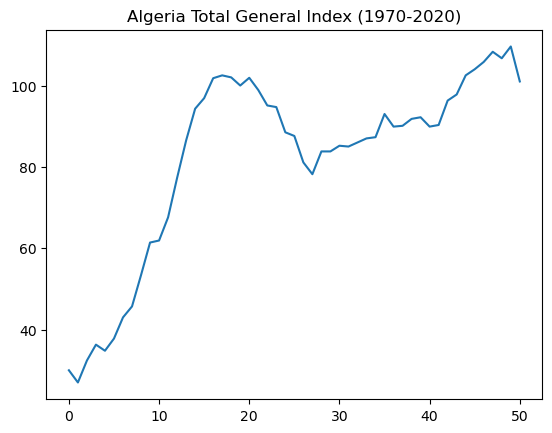

In [9]:
data['GI'].plot(title='Algeria Total General Index (1970-2020)')

# Save the figure
plt.savefig('Algeria Total General Index.png')

-------

# Method 1: Linear Regression

In [11]:
# Create a linear regression model
model = LinearRegression()
model.fit(years, index)

LinearRegression()

In [17]:
# Predict the index for the next 10 years
future_years = np.arange(2021, 2031).reshape(-1, 1)
forecasted_index = model.predict(future_years)

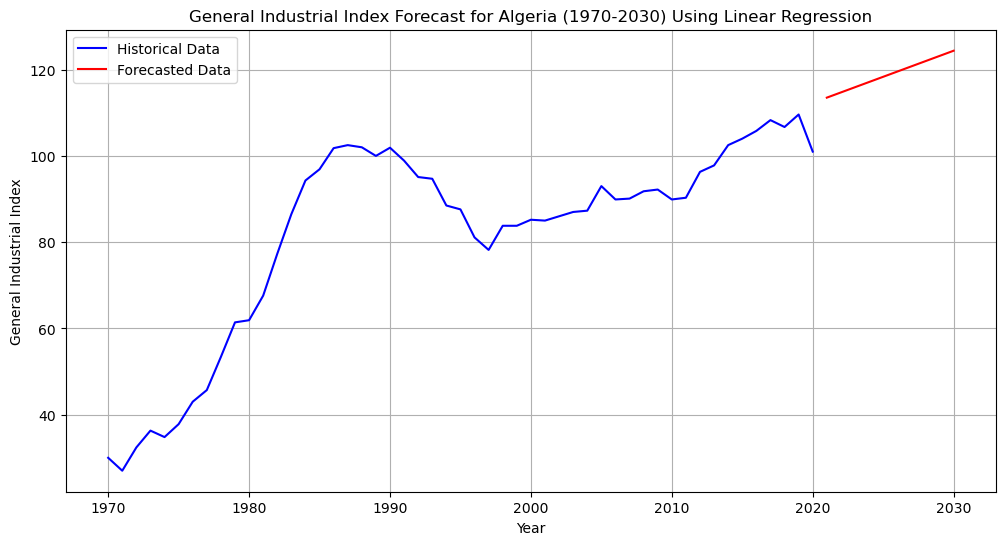

In [18]:
# Plot the historical data and the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(years, index, label='Historical Data', color='b')
plt.plot(future_years, forecasted_index, label='Forecasted Data', color='r')
plt.xlabel('Year')
plt.ylabel('General Industrial Index')
plt.title('General Industrial Index Forecast for Algeria (1970-2030) Using Linear Regression')
plt.legend()
plt.grid(True)

# Save the figure
plt.savefig('General Industrial Index Forecast for Algeria (1970-2030) Using Linear Regression.png')

# Show the plot
plt.show()

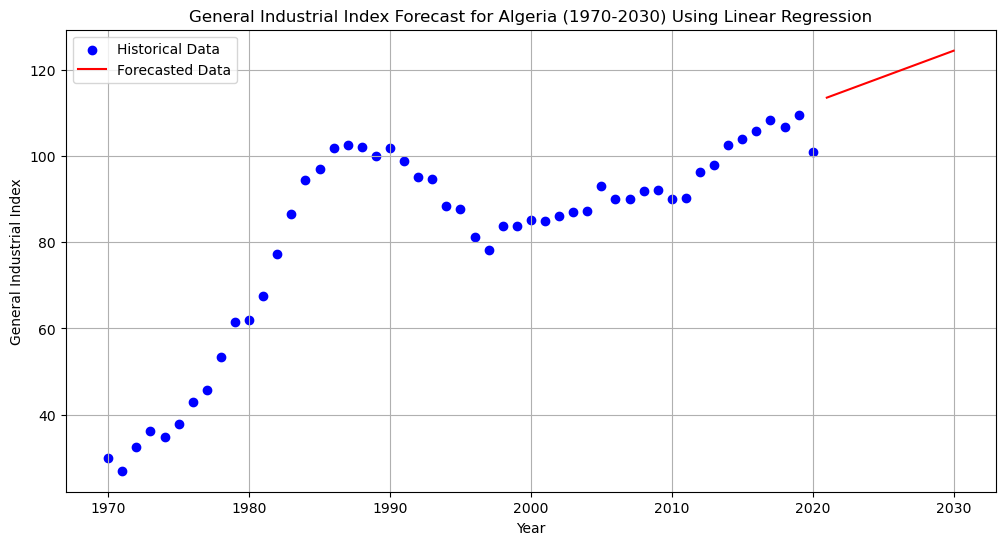

In [20]:
# Plot the historical data and the forecasted values
plt.figure(figsize=(12, 6))
plt.scatter(years, index, label='Historical Data', color='b')
plt.plot(future_years, forecasted_index, label='Forecasted Data', color='r')
plt.xlabel('Year')
plt.ylabel('General Industrial Index')
plt.title('General Industrial Index Forecast for Algeria (1970-2030) Using Linear Regression')
plt.legend()
plt.grid(True)

# Save the figure
plt.savefig('General Industrial Index Forecast for Algeria (1970-2030) Using Linear Regression_Scatter.png')

# Show the plot
plt.show()

In [21]:
# Display the forecasted index values for the next 10 years
forecast_df = pd.DataFrame({'Year': future_years.flatten(), 'Forecasted Index': forecasted_index})
print("Forecast results Using Linear Regression:")
print("=========================================")
print(forecast_df)
print("=========================================")

Forecast results Using Linear Regression:
   Year  Forecasted Index
0  2021        113.510118
1  2022        114.719104
2  2023        115.928090
3  2024        117.137077
4  2025        118.346063
5  2026        119.555050
6  2027        120.764036
7  2028        121.973023
8  2029        123.182009
9  2030        124.390995


## Calculating the Accuracy

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load the actual values for the forecasted years (2021 to 2030)
actual_values = np.array([  # Replace with actual values
    2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030
])

# Calculate forecasted values from the Linear Regression model
linear_regression_forecast = np.array([
    113.510118, 114.719104, 115.928090, 117.137077, 118.346063,
    119.555050, 120.764036, 121.973023, 123.182009, 124.390995
])

# Calculate MAE, MSE, and RMSE
linear_regression_mae = mean_absolute_error(actual_values, linear_regression_forecast)
linear_regression_mse = mean_squared_error(actual_values, linear_regression_forecast)
linear_regression_rmse = np.sqrt(linear_regression_mse)

print("Linear Regression Metrics:")
print(f"Mean Absolute Error (MAE): {linear_regression_mae}")
print(f"Mean Squared Error (MSE): {linear_regression_mse}")
print(f"Root Mean Squared Error (RMSE): {linear_regression_rmse}")


Linear Regression Metrics:
Mean Absolute Error (MAE): 1906.5494435
Mean Squared Error (MSE): 3634931.1408315324
Root Mean Squared Error (RMSE): 1906.5495379956778


----

# Method 2: Exponential Smoothing

In [23]:
# Extract the year and index data
years = data['Year']
index = data['GI']

In [24]:
# Create a DataFrame with the extracted data
df = pd.DataFrame({'Year': years, 'Index': index})

In [25]:
# Generate a date-based index
start_year = df['Year'].min()
end_year = df['Year'].max()
date_index = pd.date_range(start=f"{start_year}-01-01", end=f"{end_year}-12-31", freq='A')

In [26]:
# Set the date-based index for the DataFrame
df.set_index(date_index, inplace=True)

In [27]:
# Perform exponential smoothing forecasting
model = ExponentialSmoothing(df['Index'], seasonal='add', seasonal_periods=12)
result = model.fit()

In [28]:
# Forecast the index for the next 10 years
forecasted_index = result.forecast(steps=10)

In [29]:
# Generate a date-based index for the forecasted values
future_dates = [df.index[-1] + timedelta(days=365*i) for i in range(1, 11)]
forecasted_index.index = future_dates

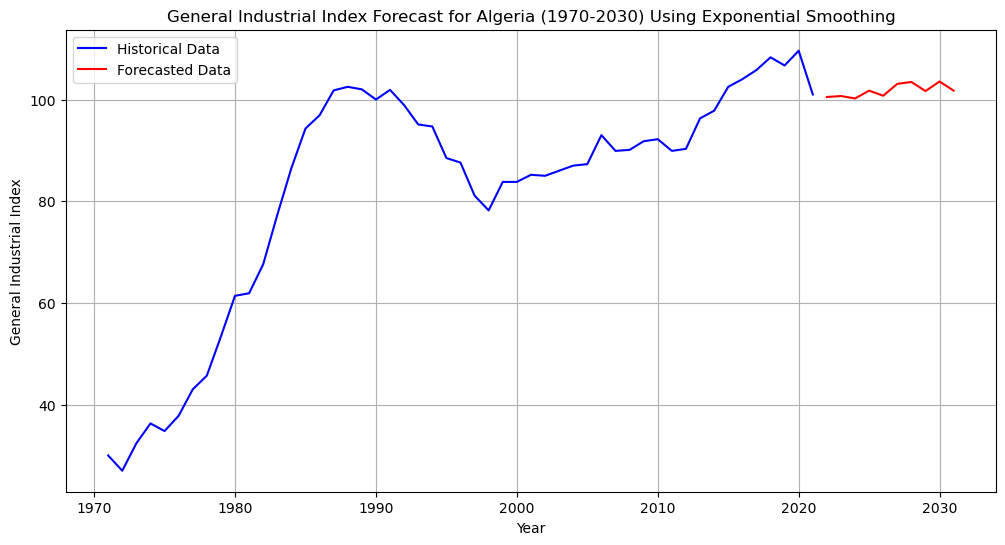

In [31]:
# Plot the historical data and the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Index'], label='Historical Data', color='b')
plt.plot(forecasted_index.index, forecasted_index.values, label='Forecasted Data', color='r')
plt.xlabel('Year')
plt.ylabel('General Industrial Index')
plt.title('General Industrial Index Forecast for Algeria (1970-2030) Using Exponential Smoothing')
plt.legend()
plt.grid(True)

# Save the figure
plt.savefig('General Industrial Index Forecast for Algeria (1970-2030) Using Exponential Smoothing.png')

# Show the plot
plt.show()

In [32]:
# Display the forecasted index values for the next 10 years
forecast_df = pd.DataFrame({'Year': [d.year for d in future_dates], 'Forecasted Index': forecasted_index.values})
print("Forecast results Using Exponential Smoothing:")
print("============================================")
print(forecast_df)
print("============================================")

Forecast results Using Exponential Smoothing:
   Year  Forecasted Index
0  2021        100.505293
1  2022        100.685924
2  2023        100.216032
3  2024        101.746320
4  2025        100.751280
5  2026        103.081338
6  2027        103.461049
7  2028        101.666272
8  2029        103.546164
9  2030        101.751232


## Calculating the Accuracy

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load the actual values for the forecasted years (2021 to 2030)
actual_values = np.array([  # Replace with actual values
    2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030
])

# Calculate forecasted values from the Exponential Smoothing model
exponential_smoothing_forecast = np.array([
    100.505293, 100.685924, 100.216032, 101.746320, 100.751280,
    103.081338, 103.461049, 101.666272, 103.546164, 101.751232
])

# Calculate MAE, MSE, and RMSE
exponential_smoothing_mae = mean_absolute_error(actual_values, exponential_smoothing_forecast)
exponential_smoothing_mse = mean_squared_error(actual_values, exponential_smoothing_forecast)
exponential_smoothing_rmse = np.sqrt(exponential_smoothing_mse)

print("Exponential Smoothing Metrics:")
print(f"Mean Absolute Error (MAE): {exponential_smoothing_mae}")
print(f"Mean Squared Error (MSE): {exponential_smoothing_mse}")
print(f"Root Mean Squared Error (RMSE): {exponential_smoothing_rmse}")


Exponential Smoothing Metrics:
Mean Absolute Error (MAE): 1923.7589096
Mean Squared Error (MSE): 3700853.392671682
Root Mean Squared Error (RMSE): 1923.760222239685


-----

# Method 3: ARIMA

In [34]:
# Fit an ARIMA model
model = ARIMA(df['Index'], order=(5, 1, 0))  # You can adjust the order parameter based on your data
result = model.fit()

In [37]:
# Forecast the index for the next 10 years
forecasted_index = result.predict(start=len(df), end=len(df) + 9)

In [38]:
# Generate a date-based index for the forecasted values
future_dates = [date_index[-1] + pd.DateOffset(years=i) for i in range(1, 11)]
forecasted_index.index = future_dates

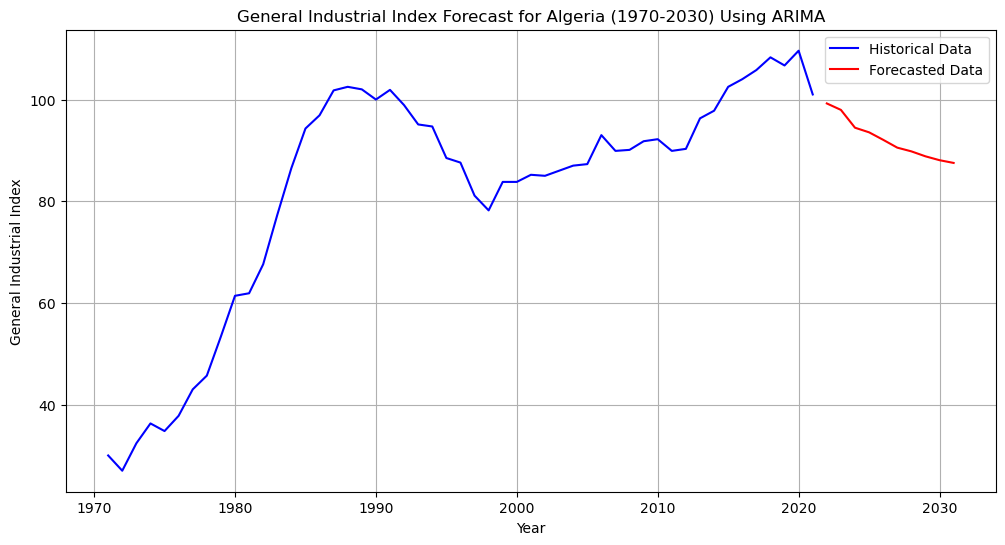

In [39]:
# Plot the historical data and the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Index'], label='Historical Data', color='b')
plt.plot(forecasted_index.index, forecasted_index.values, label='Forecasted Data', color='r')
plt.xlabel('Year')
plt.ylabel('General Industrial Index')
plt.title('General Industrial Index Forecast for Algeria (1970-2030) Using ARIMA')
plt.legend()
plt.grid(True)

# Save the figure
plt.savefig('General Industrial Index Forecast for Algeria (1970-2030) Using ARIMA.png')

# Show the plot
plt.show()

In [40]:
# Display the forecasted index values for the next 10 years
forecast_df = pd.DataFrame({'Year': [d.year for d in future_dates], 'Forecasted Index': forecasted_index.values})
print("Forecast results Using ARIMA:")
print("=============================")
print(forecast_df)
print("=============================")

Forecast results Using ARIMA:
   Year  Forecasted Index
0  2021         99.232382
1  2022         97.963523
2  2023         94.459775
3  2024         93.549295
4  2025         92.076708
5  2026         90.539457
6  2027         89.808227
7  2028         88.831117
8  2029         88.069560
9  2030         87.531452


## Calculating the Accuracy

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load the actual values for the forecasted years (2021 to 2030)
actual_values = np.array([  # Replace with actual values
    2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030
])

# Calculate forecasted values from the ARIMA model
arima_forecast = np.array([
    99.232382, 97.963523, 94.459775, 93.549295, 92.076708,
    90.539457, 89.808227, 88.831117, 88.069560, 87.531452
])

# Calculate MAE, MSE, and RMSE
arima_mae = mean_absolute_error(actual_values, arima_forecast)
arima_mse = mean_squared_error(actual_values, arima_forecast)
arima_rmse = np.sqrt(arima_mse)

print("ARIMA Metrics:")
print(f"Mean Absolute Error (MAE): {arima_mae}")
print(f"Mean Squared Error (MSE): {arima_mse}")
print(f"Root Mean Squared Error (RMSE): {arima_rmse}")


ARIMA Metrics:
Mean Absolute Error (MAE): 1933.2938504
Mean Squared Error (MSE): 3737669.738762616
Root Mean Squared Error (RMSE): 1933.3053920068128


-------

# Method 4: SARIMA

In [42]:
# Fit a SARIMA model
# You can adjust the order and seasonal_order parameters based on your data and domain knowledge
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)
model = SARIMAX(df['Index'], order=order, seasonal_order=seasonal_order)
result = model.fit()

# Forecast the index for the next 10 years
forecasted_index = result.get_forecast(steps=10)

# Generate a date-based index for the forecasted values
future_dates = [date_index[-1] + pd.DateOffset(years=i) for i in range(1, 11)]
forecasted_index = forecasted_index.predicted_mean
forecasted_index.index = future_dates

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.27164D+00    |proj g|=  2.24765D-01

At iterate    5    f=  2.19289D+00    |proj g|=  7.17204D-03

At iterate   10    f=  2.19274D+00    |proj g|=  2.05606D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     12     14      1     0     0   5.476D-06   2.193D+00
  F =   2.1927385327170170     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


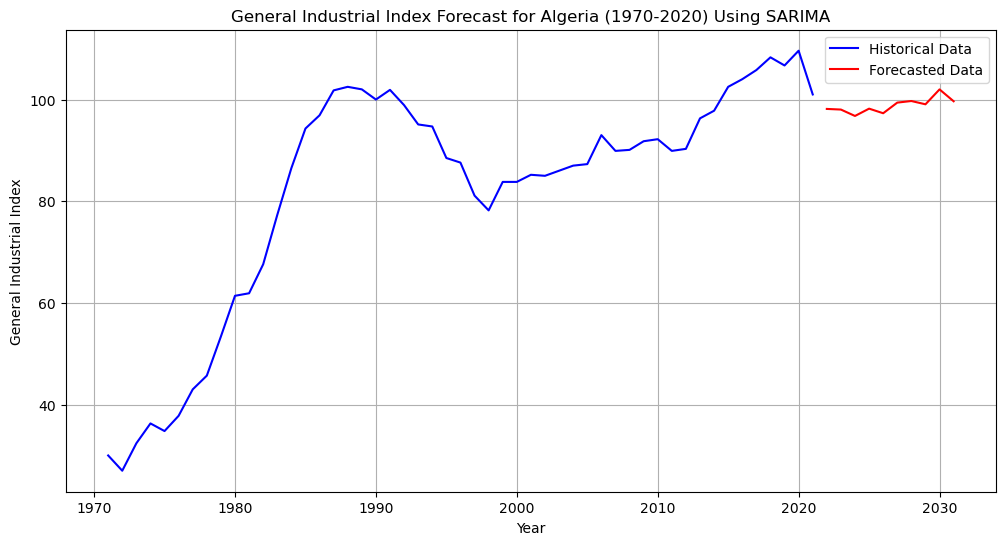

In [43]:
# Plot the historical data and the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Index'], label='Historical Data', color='b')
plt.plot(forecasted_index.index, forecasted_index.values, label='Forecasted Data', color='r')
plt.xlabel('Year')
plt.ylabel('General Industrial Index')
plt.title('General Industrial Index Forecast for Algeria (1970-2020) Using SARIMA')
plt.legend()
plt.grid(True)

# Save the figure
plt.savefig('General Industrial Index Forecast for Algeria (1970-2030) Using SARIMA.png')

# Show the plot
plt.show()

In [44]:
# Display the forecasted index values for the next 10 years
forecast_df = pd.DataFrame({'Year': [d.year for d in future_dates], 'Forecasted Index': forecasted_index.values})
print("Forecast results Using SARIMA:")
print("=============================")
print(forecast_df)
print("=============================")

Forecast results Using SARIMA:
   Year  Forecasted Index
0  2021         98.152887
1  2022         98.029634
2  2023         96.769332
3  2024         98.208912
4  2025         97.305021
5  2026         99.395185
6  2027         99.709836
7  2028         99.063797
8  2029        101.991889
9  2030         99.660582


## Calculating the Accuracy

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load the actual values for the forecasted years (2021 to 2030)
actual_values = np.array([  # Replace with actual values
    2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030
])

# Calculate forecasted values from the SARIMA model
sarima_forecast = np.array([
    98.152887, 98.029634, 96.769332, 98.208912, 97.305021,
    99.395185, 99.709836, 99.063797, 101.991889, 99.660582
])

# Calculate MAE, MSE, and RMSE
sarima_mae = mean_absolute_error(actual_values, sarima_forecast)
sarima_mse = mean_squared_error(actual_values, sarima_forecast)
sarima_rmse = np.sqrt(sarima_mse)

print("SARIMA Metrics:")
print(f"Mean Absolute Error (MAE): {sarima_mae}")
print(f"Mean Squared Error (MSE): {sarima_mse}")
print(f"Root Mean Squared Error (RMSE): {sarima_rmse}")


SARIMA Metrics:
Mean Absolute Error (MAE): 1926.6712925
Mean Squared Error (MSE): 3712066.5715465127
Root Mean Squared Error (RMSE): 1926.6724089856357


End